In [23]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy.stats import chi2
from linearmodels.panel import PanelOLS, RandomEffects
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import pearsonr

# Data Preparation

In [24]:
province_areas_in_hectares = {
    "Banten, Prop.": 935300,  # Corrected value based on recent data
    "Bengkulu, Prop.": 2012800,  # Corrected value based on recent data
    "Gorontalo, Prop.": 1202500,  # Corrected value based on recent data
    "Jambi, Prop.": 4902700,  # Corrected value based on recent data
    "Jawa Barat, Prop.": 3704500,  # Corrected value based on recent data
    "Kalimantan Barat, Prop.": 14703700,  # Corrected value based on recent data
    "Kalimantan Selatan, Prop.": 3713500,  # Corrected value based on recent data
    "Kalimantan Tengah, Prop.": 15344400,  # Corrected value based on recent data
    "Kalimantan Timur, Prop.": 12698100,  # Corrected value based on recent data
    "Kalimantan Utara, Prop.": 7010100,  # Corrected value based on recent data
    "Kepulauan Bangka-Belitung, Prop.": 166900,  # Corrected value based on recent data
    "Kepulauan Riau, Prop.": 82700,  # Corrected value based on recent data
    "Lampung, Prop.": 3357000,  # Corrected value based on recent data
    "Maluku, Prop.": 4615800,  # Corrected value based on recent data
    "Nanggroe Aceh Darussalam, Prop.": 5683500,  # Corrected value based on recent data
    "Papua Barat, Prop.": 76042200,  # Approximation based on combined areas of new provinces
    "Papua, Prop.": 36546600,
    "Riau, Prop.": 8993600,  # Corrected value based on recent data
    "Sulawesi Barat, Prop.": 1659500,  # Updated based on available information
    "Sulawesi Selatan, Prop.": 4533100,  # Corrected value based on recent data
    "Sulawesi Tengah, Prop.": 6160600,  # Corrected value based on recent data
    "Sulawesi Tenggara, Prop.": 3616000,  # Corrected value based on recent data
    "Sumatera Barat, Prop.": 421200,  # Corrected value based on recent data
    "Sumatera Selatan, Prop.": 9159200,  # Corrected value based on recent data
    "Sumatera Utara, Prop.": 7246100  # Corrected value based on recent data
}


In [25]:
data = pd.read_excel("data/Data Palm Oil.xlsx")
numerical_cols = ['GvArea', 'GvProd', 'PvArea', 'PvProd', 'ShArea', 'ShProd', 'TotalArea', 'TotalProd', 'GDRP', 'MANUFACTURE', 'BUSSERV', 'ELECTRICITY', 'HDI', 'EDU', 'POP']
data[numerical_cols] = data[numerical_cols].apply(pd.to_numeric, errors='coerce')
data["Time"] = data["Time"].astype(int)
data

,Provinces Name,Time,GvArea,GvProd,PvArea,PvProd,ShArea,ShProd,TotalArea,TotalProd,GDRP,MANUFACTURE,BUSSERV,ELECTRICITY,HDI,EDU,POP
0,"Bali, Prop.",2010,0,0,0,0,0,0,0,0,9.374935e+07,6.562939e+06,1.060818e+06,97.721440,70.10,57.150000,3907423
1,"Bali, Prop.",2011,0,0,0,0,0,0,0,0,9.999163e+07,6.620875e+06,1.096721e+06,98.850300,70.87,60.540000,3957563
2,"Bali, Prop.",2012,0,0,0,0,0,0,0,0,1.069515e+08,6.966906e+06,1.121242e+06,99.100000,71.62,63.280000,4007236
3,"Bali, Prop.",2013,0,0,0,0,0,0,0,0,1.141036e+08,7.565248e+06,1.222187e+06,99.418709,72.09,67.093948,4056343
4,"Bali, Prop.",2014,0,0,0,0,0,0,0,0,1.217876e+08,8.237391e+06,1.313691e+06,99.493095,72.48,70.830000,4104890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,"Sumatera Utara, Prop.",2016,363878,1118555,560836,1633530,417809,1231646,1342523,3983731,4.637755e+08,9.068099e+07,4.065405e+06,96.836296,70.00,66.849609,14102911
370,"Sumatera Utara, Prop.",2017,316508,1074901,562921,1758936,581747,2018126,1461176,4851963,4.875312e+08,9.277725e+07,4.368695e+06,97.412926,70.57,67.045288,14262147
371,"Sumatera Utara, Prop.",2018,306135,1237231,553993,2136014,691475,2364026,1551603,5737271,5.127626e+08,9.617460e+07,4.678860e+06,97.554115,71.18,67.268456,14415391
372,"Sumatera Utara, Prop.",2019,305372,1339381,628587,2766395,439315,1541537,1373274,5647313,5.395139e+08,9.736210e+07,4.950740e+06,98.368385,71.74,67.533150,14562549


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinces Name  374 non-null    object 
 1   Time            374 non-null    int32  
 2   GvArea          374 non-null    int64  
 3   GvProd          374 non-null    int64  
 4   PvArea          374 non-null    int64  
 5   PvProd          374 non-null    int64  
 6   ShArea          374 non-null    int64  
 7   ShProd          374 non-null    int64  
 8   TotalArea       374 non-null    int64  
 9   TotalProd       374 non-null    int64  
 10  GDRP            374 non-null    float64
 11  MANUFACTURE     340 non-null    float64
 12  BUSSERV         340 non-null    float64
 13  ELECTRICITY     369 non-null    float64
 14  HDI             337 non-null    float64
 15  EDU             369 non-null    float64
 16  POP             374 non-null    int64  
dtypes: float64(6), int32(1), int64(9), 

# Descriptive Data Analysis

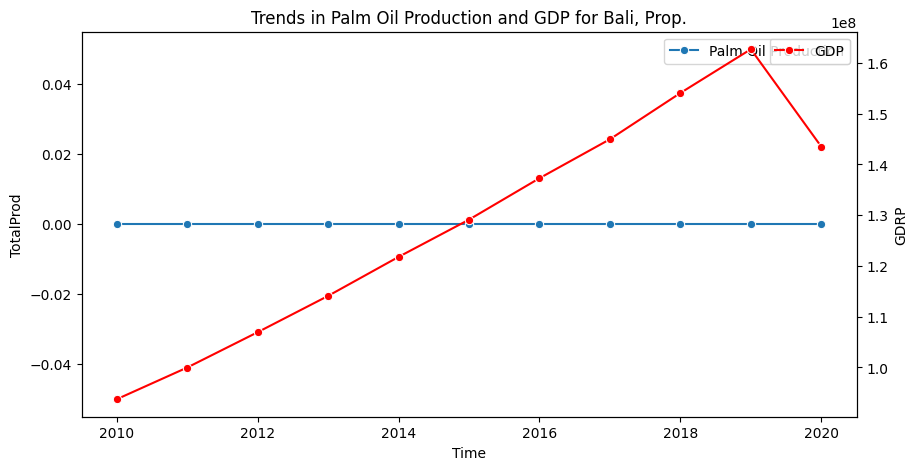

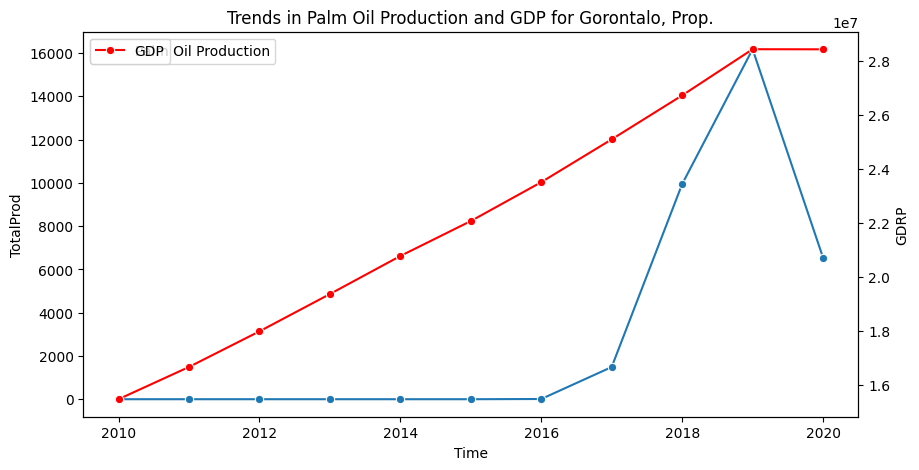

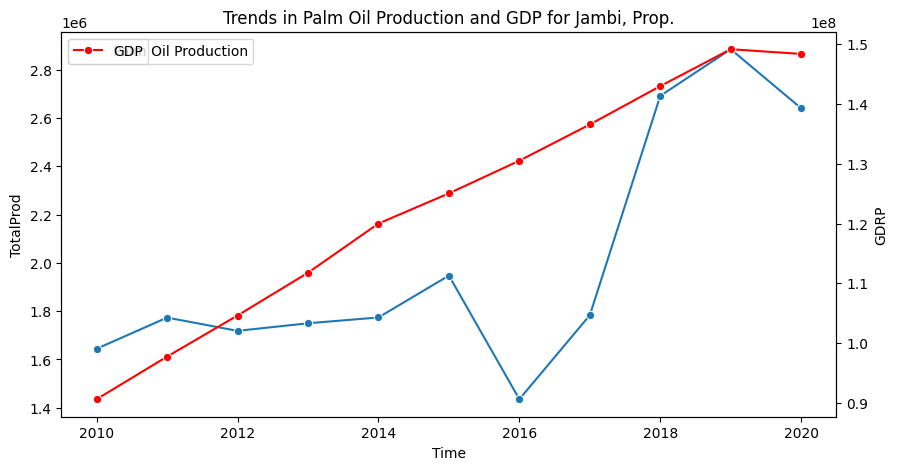

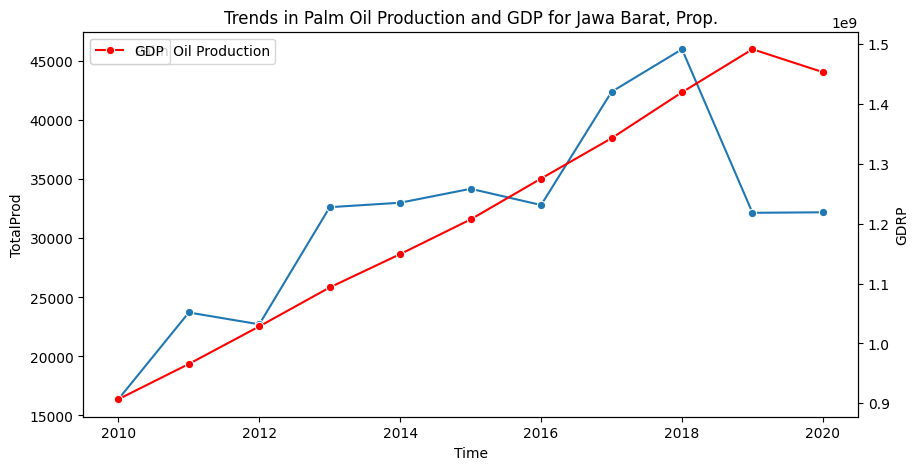

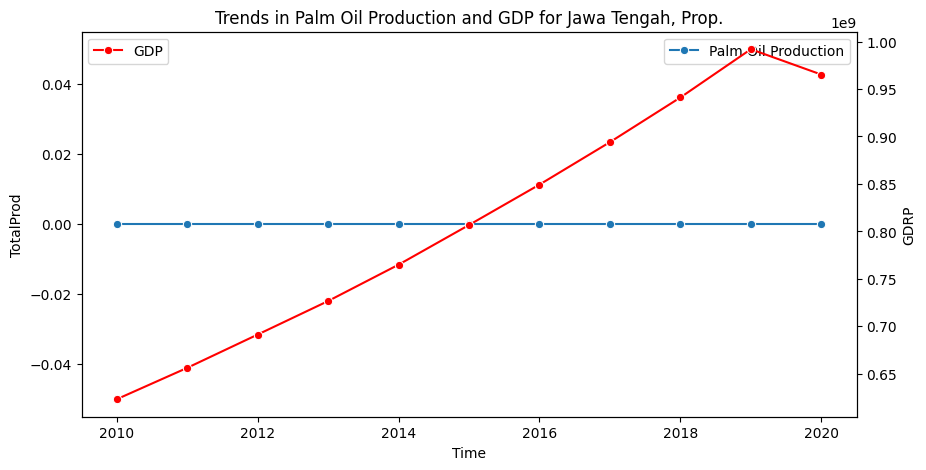

In [27]:
sample_provinces = data['Provinces Name'].unique()[:5]  # Change as needed
for province in sample_provinces:
    subset = data.loc[data['Provinces Name'] == province]
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='Time', y='TotalProd', data=subset, marker='o', label='Palm Oil Production')
    ax2 = plt.twinx()
    sns.lineplot(x='Time', y='GDRP', data=subset, ax=ax2, color='r', marker='o', label='GDP')
    plt.title(f'Trends in Palm Oil Production and GDP for {province}')
    plt.legend()
    plt.show()

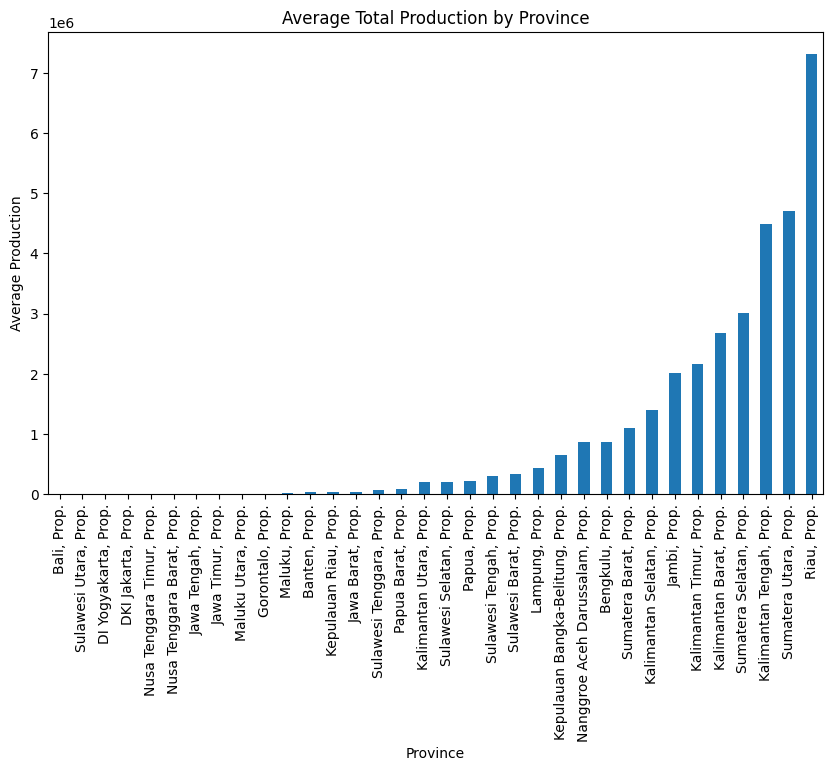

In [28]:

province_means = data.groupby('Provinces Name')['TotalProd'].mean()
# print("Average Production by Province:\n", province_means)
province_means.sort_values().plot(kind='bar', figsize=(10, 6))
plt.title('Average Total Production by Province')
plt.ylabel('Average Production')
plt.xlabel('Province')
plt.show()


In [29]:
po_provinces = province_means[province_means > 0].index.tolist()
filtered_data = data[data['Provinces Name'].isin(po_provinces)]

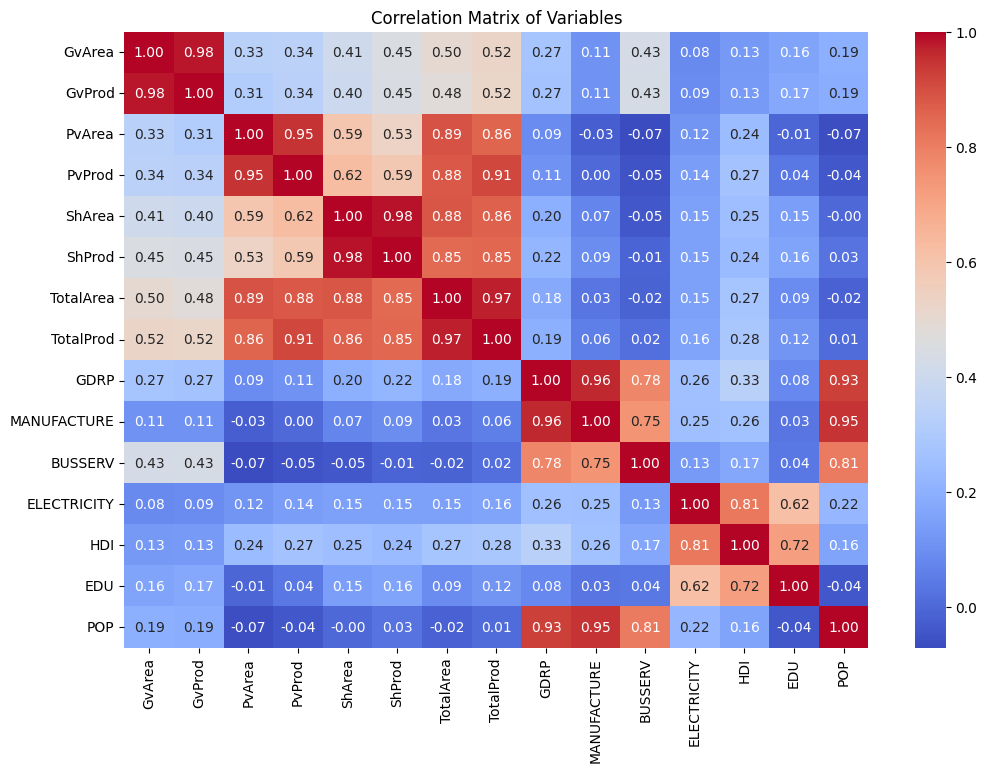

In [30]:
# Calculate correlation matrix
numeric_data = filtered_data.select_dtypes(include=[np.number]).drop(columns=['Time'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()

In [31]:
filtered_data.drop(columns = ["GvProd", "PvProd","ShProd", "TotalProd"], inplace = True)
filtered_data["lnGDRP"] = np.log(filtered_data["GDRP"]*1e6)
filtered_data['Province_Area'] = filtered_data['Provinces Name'].map(province_areas_in_hectares)
filtered_data["GvArea_share"] = filtered_data["GvArea"] / filtered_data["Province_Area"]/100
filtered_data["PvArea_share"] = filtered_data["PvArea"] / filtered_data["Province_Area"]/100
filtered_data["ShArea_share"] = filtered_data["ShArea"] / filtered_data["Province_Area"]/100
filtered_data["TotalArea_share"] = filtered_data["TotalArea"] / filtered_data["Province_Area"]/100
filtered_data.drop(columns = ["Province_Area", "GvArea", "PvArea", "ShArea", "TotalArea"], inplace = True)
filtered_data.head()


C:\Users\moeth\AppData\Local\Temp\ipykernel_11104\3412396493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(columns = ["GvProd", "PvProd","ShProd", "TotalProd"], inplace = True)
C:\Users\moeth\AppData\Local\Temp\ipykernel_11104\3412396493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["lnGDRP"] = np.log(filtered_data["GDRP"]*1e6)
C:\Users\moeth\AppData\Local\Temp\ipykernel_11104\3412396493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,Provinces Name,Time,GDRP,MANUFACTURE,BUSSERV,ELECTRICITY,HDI,EDU,POP,lnGDRP,GvArea_share,PvArea_share,ShArea_share,TotalArea_share
11,"Gorontalo, Prop.",2010,1.547574e+07,632216.60919,15723.92191,77.303730,62.65,39.150000,1044814,30.370295,0.0,0.0,0.000000,0.000000
12,"Gorontalo, Prop.",2011,1.666909e+07,681363.29943,16599.61680,80.877330,63.48,44.340000,1062561,30.444577,0.0,0.0,0.000000,0.000000
13,"Gorontalo, Prop.",2012,1.798707e+07,737130.25913,17727.47021,82.560000,64.16,44.660000,1080287,30.520675,0.0,0.0,0.000000,0.000000
14,"Gorontalo, Prop.",2013,1.936757e+07,796021.12372,19054.11587,89.504013,64.70,47.832249,1097990,30.594621,0.0,0.0,0.000000,0.000000
15,"Gorontalo, Prop.",2014,2.077580e+07,843803.07001,20190.42371,91.643738,65.17,56.070000,1115633,30.664810,0.0,0.0,0.000036,0.000036


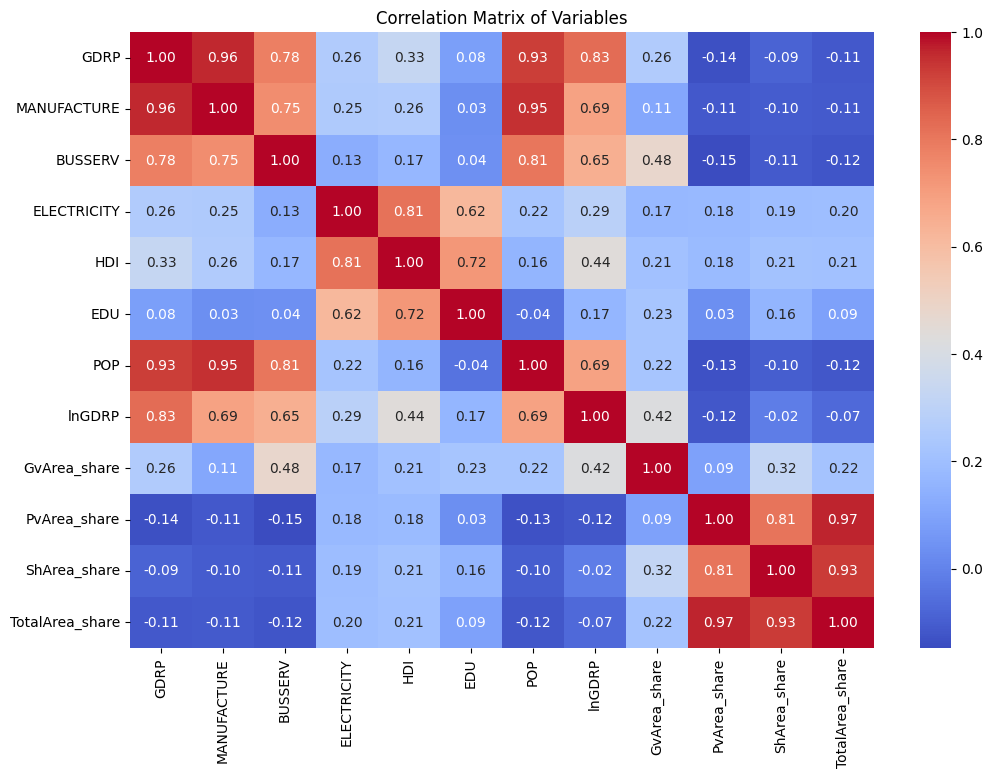

In [32]:
# Calculate correlation matrix
numeric_data = filtered_data.select_dtypes(include=[np.number]).drop(columns=['Time'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()

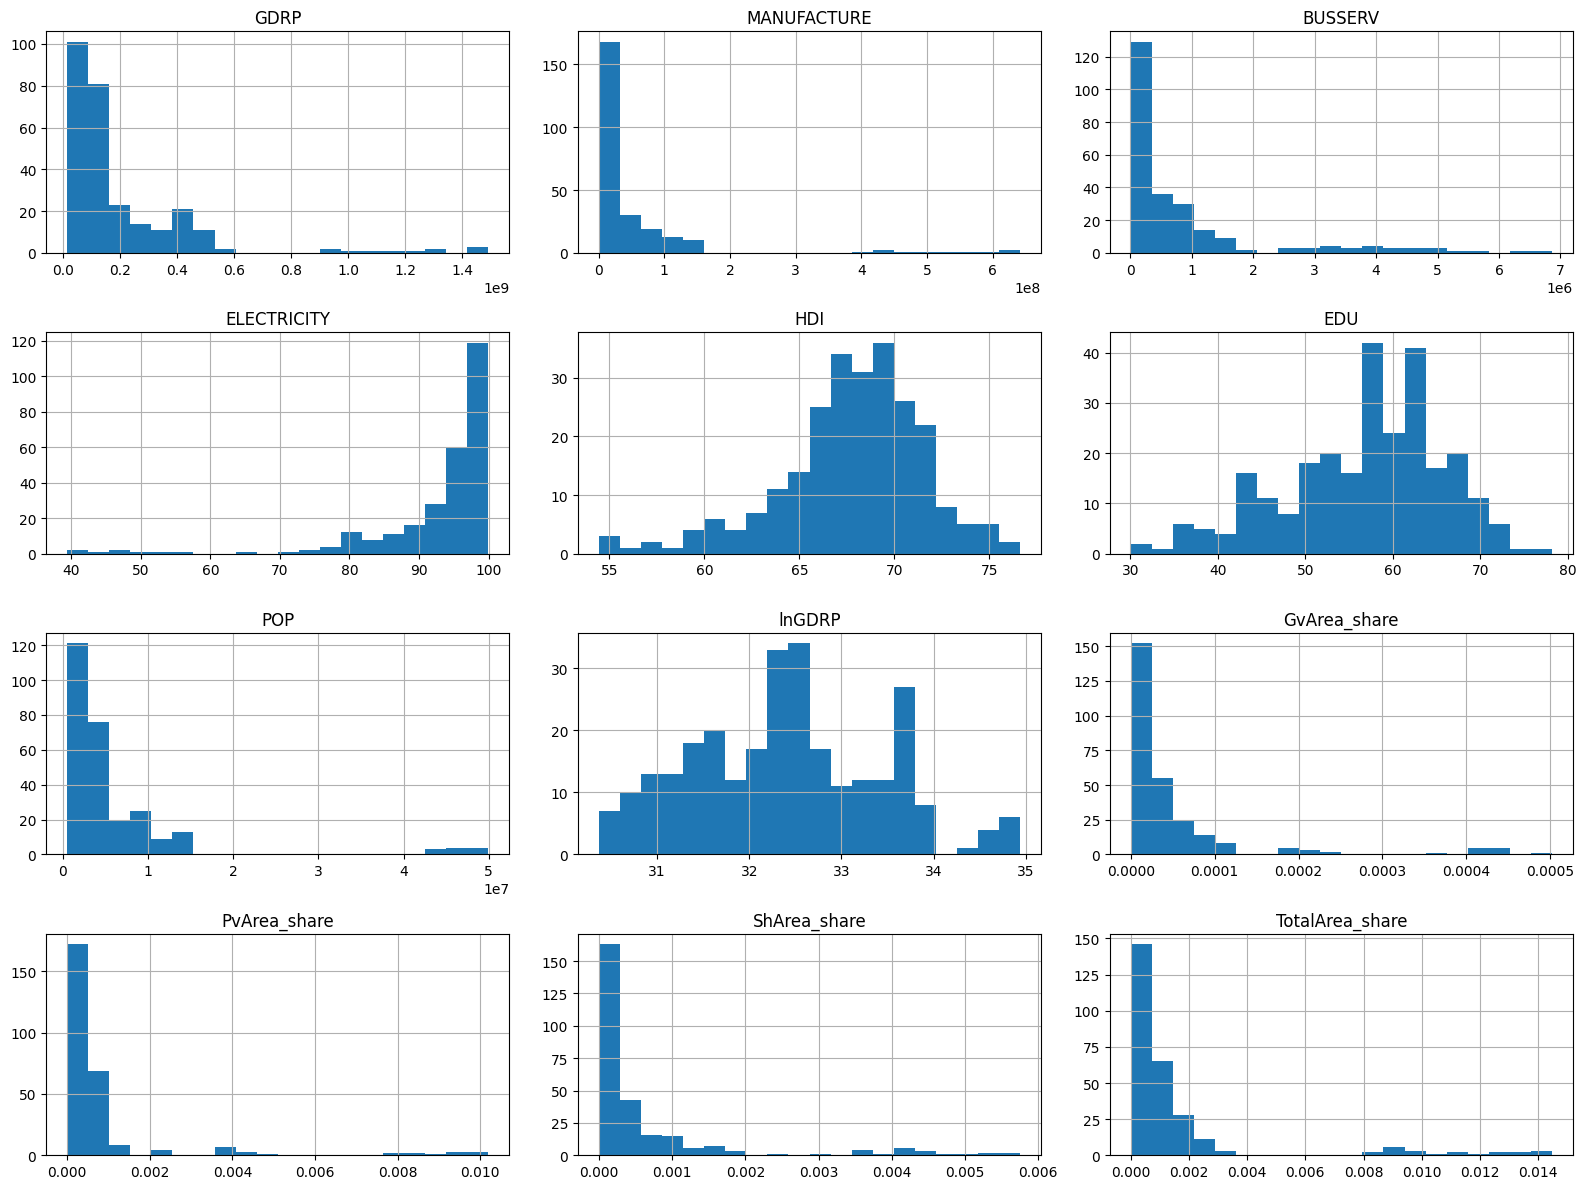

In [33]:
numeric_data.hist(figsize=(16,12), bins=20)
plt.tight_layout()
plt.show()

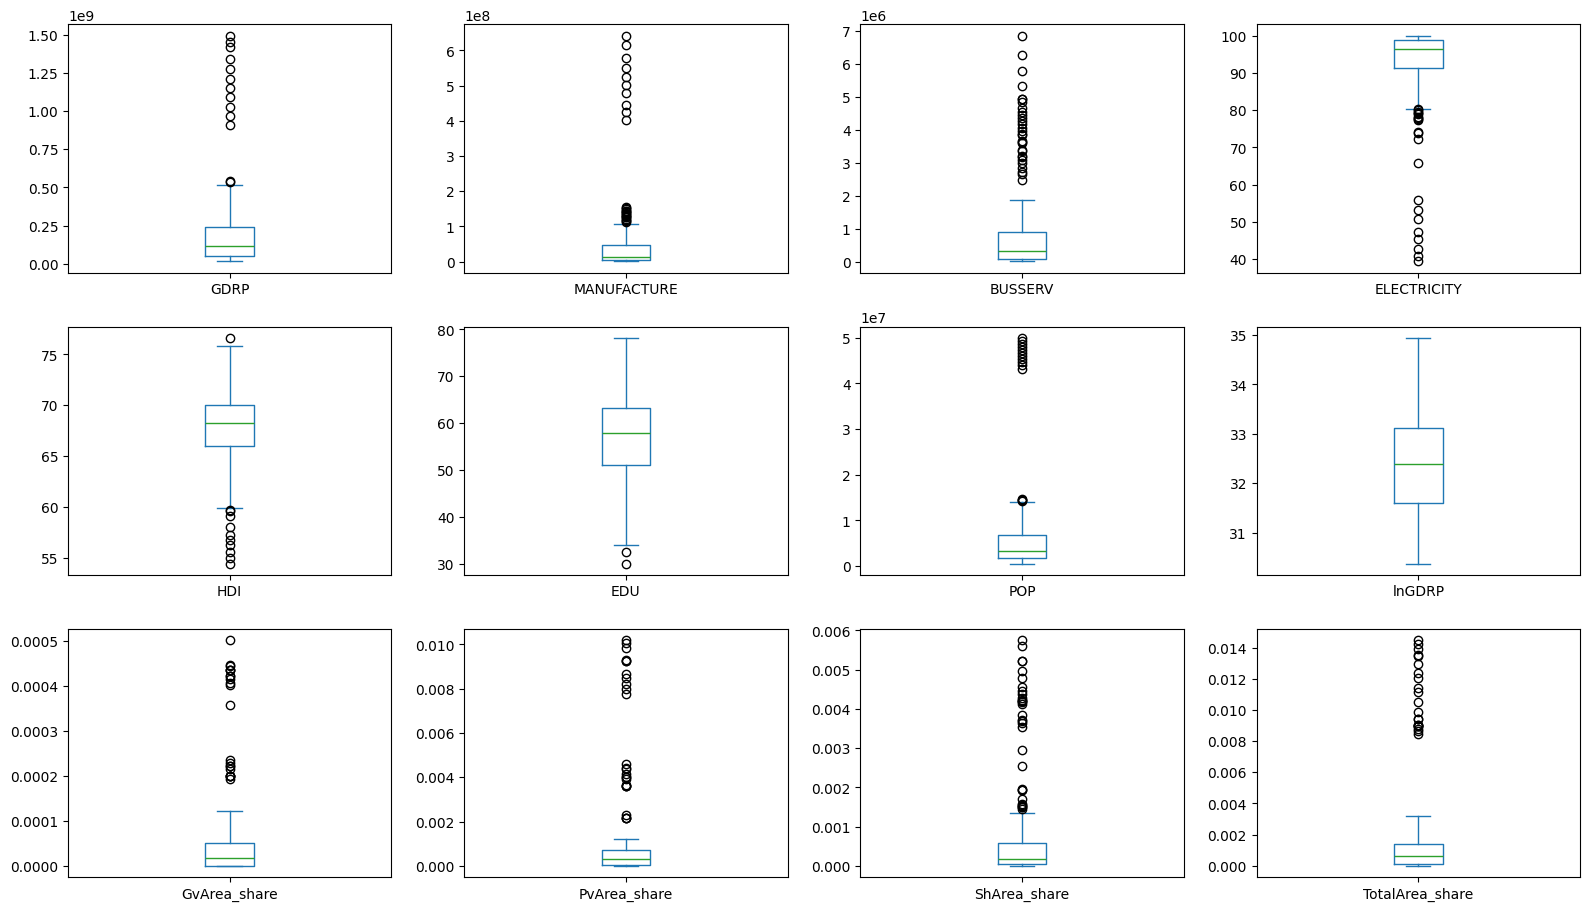

In [34]:
numeric_data.plot(kind ="box", subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(16,12))
plt.tight_layout()
plt.show()

# Fixed Effect Model

In [35]:
filtered_data.set_index(['Provinces Name', 'Time'], inplace=True)

In [36]:
dep_var = filtered_data['lnGDRP']
exog_vars = ["GvArea_share", "PvArea_share", "ShArea_share", "TotalArea_share", "ELECTRICITY", "HDI", "EDU", "POP"]
exog = sm.add_constant(filtered_data[exog_vars])  # Adding a constant term for the intercept
fe_model = PanelOLS(dep_var, exog, entity_effects=True, time_effects=True)
fe_result = fe_model.fit(cov_type='clustered', cluster_entity=True)
print(fe_result)


                          PanelOLS Estimation Summary                           
Dep. Variable:                 lnGDRP   R-squared:                        0.2051
Estimator:                   PanelOLS   R-squared (Between):              0.0693
No. Observations:                 245   R-squared (Within):               0.8237
Date:                Sat, Jan 11 2025   R-squared (Overall):              0.0949
Time:                        20:55:47   Log-likelihood                    437.56
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      6.5482
Entities:                          25   P-value                           0.0000
Avg Obs:                       9.8000   Distribution:                   F(8,203)
Min Obs:                       5.0000                                           
Max Obs:                      10.0000   F-statistic (robust):             1.4169
                            

c:\Users\moeth\miniconda3\Lib\site-packages\linearmodels\panel\model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


# Random Effect Model

In [37]:
re_model = RandomEffects(dep_var, exog)
re_result = re_model.fit()
print(re_result)

                        RandomEffects Estimation Summary                        
Dep. Variable:                 lnGDRP   R-squared:                        0.9202
Estimator:              RandomEffects   R-squared (Between):              0.3429
No. Observations:                 245   R-squared (Within):               0.9286
Date:                Sat, Jan 11 2025   R-squared (Overall):              0.3643
Time:                        20:55:47   Log-likelihood                    401.07
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      340.29
Entities:                          25   P-value                           0.0000
Avg Obs:                       9.8000   Distribution:                   F(8,236)
Min Obs:                       5.0000                                           
Max Obs:                      10.0000   F-statistic (robust):             316.27
                            

c:\Users\moeth\miniconda3\Lib\site-packages\linearmodels\panel\model.py:2759: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


# Hausmann Test

In [38]:
# Calculate the difference in coefficients between models
diff = fe_result.params - re_result.params

# Variance of the difference
var_diff = fe_result.cov - re_result.cov

# Hausman test statistic
test_stat = diff.T @ np.linalg.inv(var_diff) @ diff

# Degrees of freedom
df = len(diff)

# P-value from Chi-squared distribution
p_value = 1 - chi2.cdf(test_stat, df)

print(f'Hausman Test Statistic: {test_stat}')
print(f'P-value: {p_value}') # p > 0.05 so the fixed effects model is more appropriate than the random effects model.

Hausman Test Statistic: 2.492449329288547
P-value: 0.9810858637198736


# Detail Analysis of Fixed Effect Model

# Heteroscaedasticity and Autocorrelation Test

In [39]:
# # Assuming 'results' is the output from your PanelOLS fit
# residuals = fe_result.resids
# exog_het = filtered_data[exog_vars].loc[residuals.index]

# if 'const' not in exog_het.columns:
#     exog_het = sm.add_constant(exog_het)
# exog_het = exog_het.loc[residuals.index]
# # Test for heteroscedasticity
# bp_test = het_breuschpagan(residuals, exog_het)
# white_test = het_white(residuals, exog_het)

# print('Breusch-Pagan test: p-value =', bp_test[1])
# print('White test: p-value =', white_test[1])

# # Test for autocorrelation
# dw_stat = durbin_watson(residuals)
# print('Durbin-Watson statistic:', dw_stat) #values between 1.5 and 2.5 indicate no autocorrelation (range = 0-4)


# Lag Testing

In [40]:
# Create lagged variables
filtered_data['GvArea_share_lag5'] = filtered_data.groupby(level=0)['GvArea_share'].shift(1)
filtered_data['PvArea_share_lag5'] = filtered_data.groupby(level=0)['PvArea_share'].shift(1)
filtered_data['ShArea_share_lag5'] = filtered_data.groupby(level=0)['ShArea_share'].shift(1)
filtered_data['TotalArea_share_lag5'] = filtered_data.groupby(level=0)['TotalArea_share'].shift(1)

# Update the model to include lagged variables
exog_vars = ['GvArea_share_lag5', 'PvArea_share_lag5', 'ShArea_share_lag5', 'TotalArea_share_lag5', 'ELECTRICITY', 'EDU', 'POP']
exog = sm.add_constant(filtered_data[exog_vars].dropna())  # Adding a constant term for the intercept
dep_var = filtered_data['lnGDRP'].loc[exog.index]  # Ensure alignment of the dependent variable with independent variables

# Creating the fixed effects model
model = PanelOLS(dep_var, exog, entity_effects=True)
results = model.fit()

# Output the results
print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 lnGDRP   R-squared:                        0.8070
Estimator:                   PanelOLS   R-squared (Between):              0.4772
No. Observations:                 246   R-squared (Within):               0.8070
Date:                Sat, Jan 11 2025   R-squared (Overall):              0.4832
Time:                        20:55:47   Log-likelihood                    320.12
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      127.86
Entities:                          25   P-value                           0.0000
Avg Obs:                       9.8400   Distribution:                   F(7,214)
Min Obs:                       6.0000                                           
Max Obs:                      10.0000   F-statistic (robust):             127.86
                            

C:\Users\moeth\AppData\Local\Temp\ipykernel_11104\1230331848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['GvArea_share_lag5'] = filtered_data.groupby(level=0)['GvArea_share'].shift(1)
C:\Users\moeth\AppData\Local\Temp\ipykernel_11104\1230331848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['PvArea_share_lag5'] = filtered_data.groupby(level=0)['PvArea_share'].shift(1)
C:\Users\moeth\AppData\Local\Temp\ipykernel_11104\1230331848.py:4: SettingWithCopyWarning: 
A value 

# Resource Curse Provinces

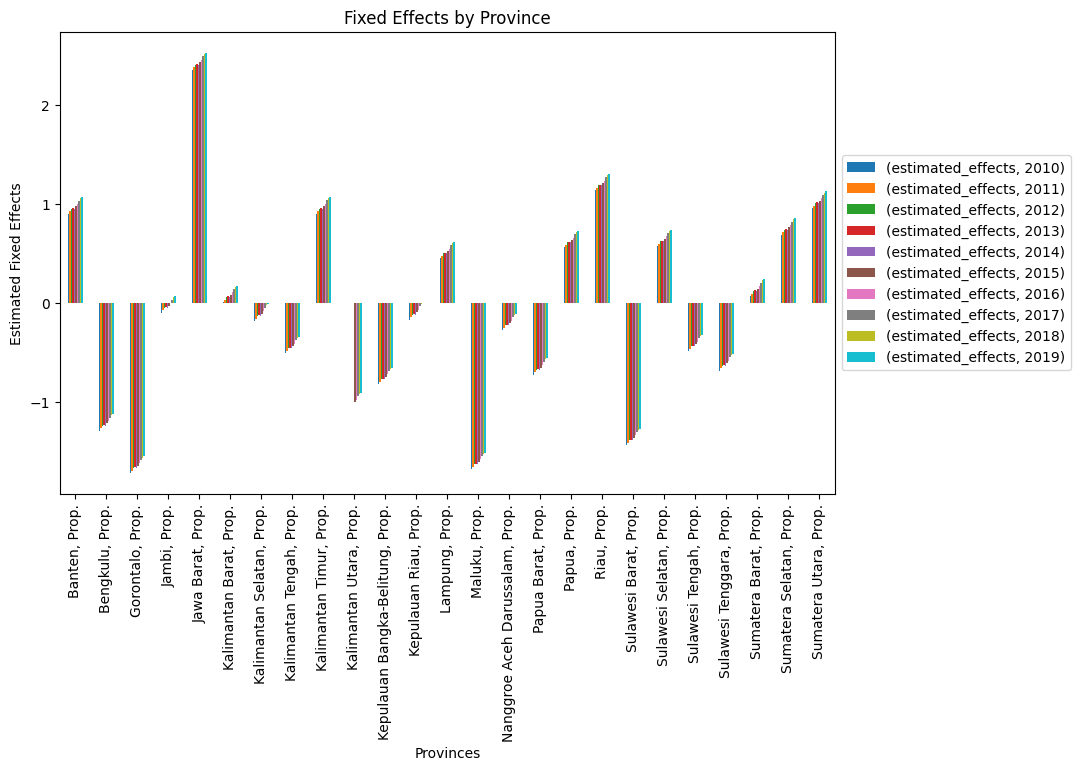

In [41]:
# Assuming 'results' is the output from your PanelOLS model
fixed_effects = fe_result.estimated_effects.unstack()  # This reshapes the fixed effects to be easier to analyze

fixed_effects.plot(kind='bar', figsize=(10, 6))
plt.title('Fixed Effects by Province')
plt.ylabel('Estimated Fixed Effects')
plt.xlabel('Provinces')
plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5))
plt.show()


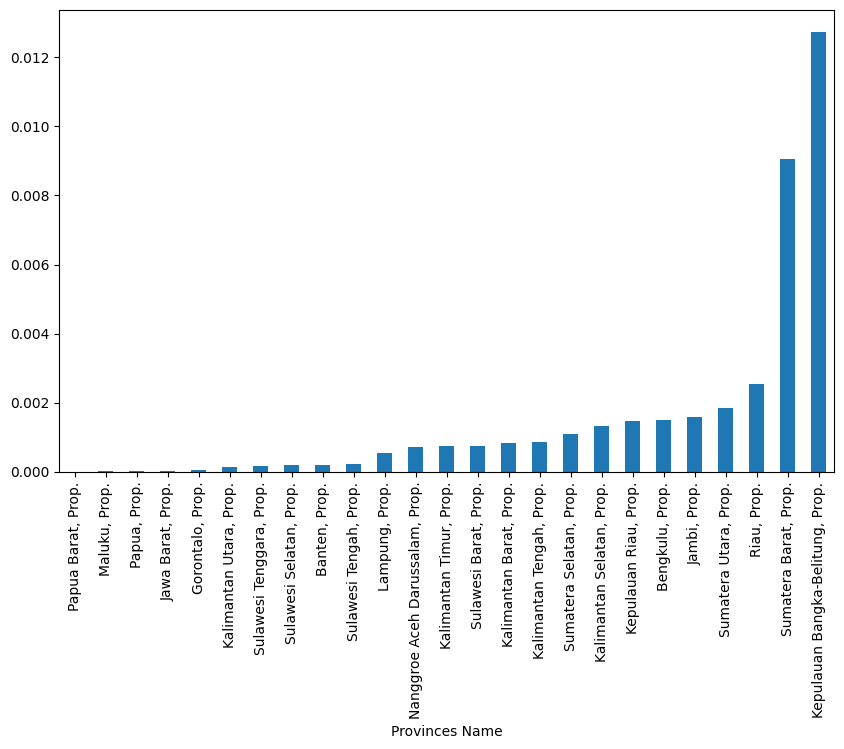

In [42]:
filtered_data.groupby('Provinces Name')['TotalArea_share'].mean().sort_values().plot(kind='bar', figsize=(10, 6));

<Axes: xlabel='Provinces Name'>

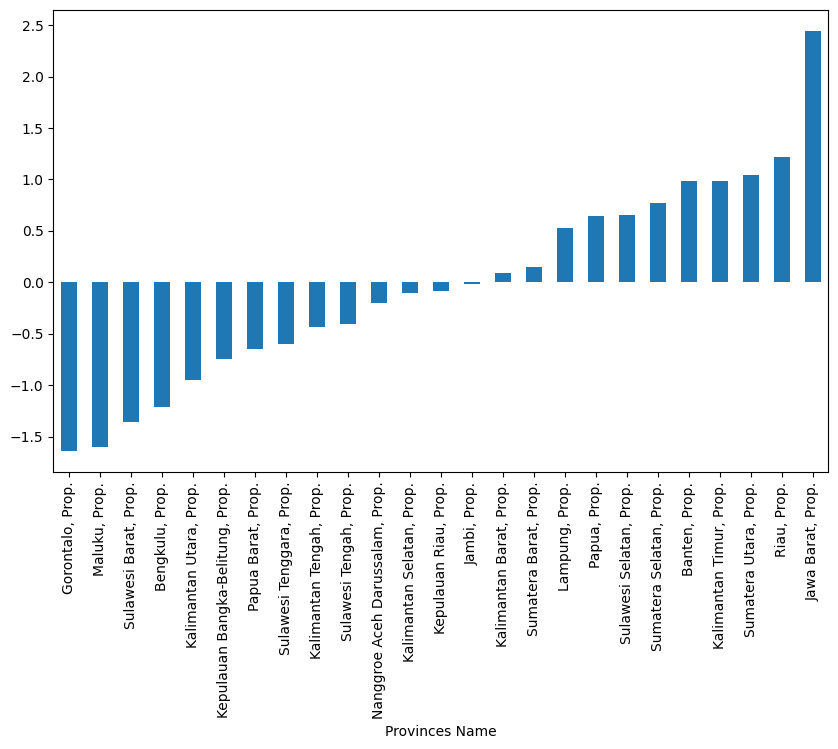

In [43]:
fixed_effects_mean = fixed_effects.mean(axis=1) 
fixed_effects_mean.sort_values().plot(kind='bar', figsize=(10, 6))